In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import folium
import json

In [2]:
df_ev = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')
df_ev

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135033,5YJSA1E29L,King,Yarrow Point,WA,98004.0,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,330.0,0.0,48.0,124776627,POINT (-122.20190499999995 47.61385000000007),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
135034,5YJYGDEE7M,King,Burien,WA,98168.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,33.0,142857676,POINT (-122.28645999999998 47.47613000000007),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10
135035,5YJSA1E51N,Pierce,Gig Harbor,WA,98335.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,220157724,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
135036,KM8KMDAF3P,Grant,Ephrata,WA,98823.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,13.0,223872596,POINT (-119.55512999999996 47.319360000000074),PUD NO 2 OF GRANT COUNTY,5.302501e+10


<Axes: xlabel='count', ylabel='Make'>

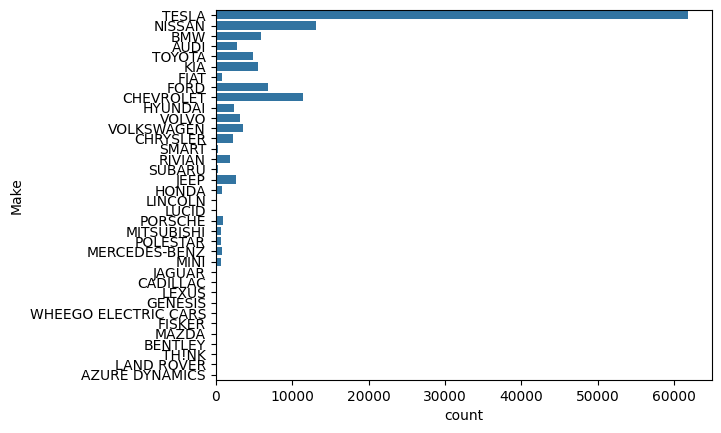

In [3]:
sns.countplot(df_ev['Make'])

In [4]:
df_ev_2 = pd.read_csv('data/IEA Global EV Data 2024 new.csv')
df_ev_2

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"
...,...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55,"5500,00%"
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31,"3100,00%"
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000,"940000000,00%"
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000,"1500000000,00%"


<Axes: xlabel='count', ylabel='region'>

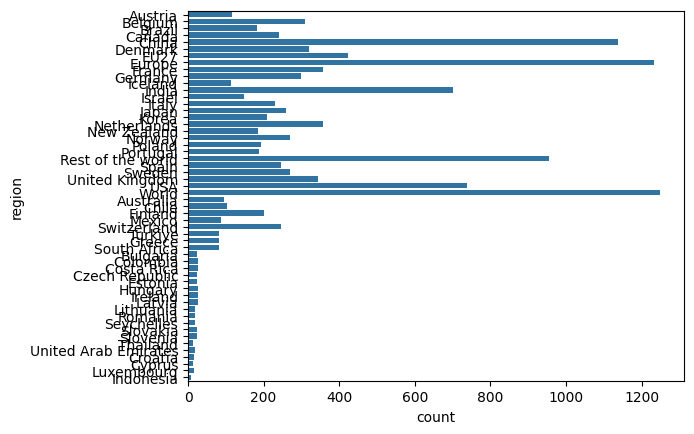

In [5]:
sns.countplot(df_ev_2['region'])

In [6]:
df_ev_2 = df_ev_2.drop(['percentage', 'value'], axis=1)

In [7]:
df_ev_2

,region,category,parameter,mode,powertrain,year,unit
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles
1,Austria,Historical,EV stock share,Cars,EV,2010,percent
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles
...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points


In [8]:
df_ev.drop(['Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'], axis=1, inplace=True)

In [9]:
df_ev.drop(['VIN (1-10)', 'Postal Code'], axis=1, inplace=True)

In [10]:
df_ev

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,Thurston,Tumwater,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
1,Island,Clinton,WA,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUGET SOUND ENERGY INC
2,Snohomish,Snohomish,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
3,King,Seattle,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,Snohomish,Edmonds,WA,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...
135033,King,Yarrow Point,WA,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
135034,King,Burien,WA,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
135035,Pierce,Gig Harbor,WA,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
135036,Grant,Ephrata,WA,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PUD NO 2 OF GRANT COUNTY


In [11]:
df_kor_ev = pd.read_csv('data/한국전력공사_지역별 전기차 현황정보_201008.csv')
df_kor_ev

,기준일,부산,대구,대전,광주,경기,강원,경북,경남,충북,충남,전북,전남,세종,서울,인천,울산,제주,합계
0,2018-12-31,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756.0
1,2019-12-31,3216,11313,2555,2464,11750,2445,4051,3626,2412,2841,1841,3326,903,14952,2598,1447,18178,89918.0
2,2020-08-31,4320,12468,3338,3046,17197,3091,5400,5003,3319,4252,2906,4576,1076,20997,4204,2142,20699,NaN


In [12]:
df_kor_ev_1 = pd.read_csv('data/한국전력공사_지역별 전기차 현황정보_201008.csv', encoding='UTF-8')
df_kor_ev_2 = pd.read_csv('data/한국전력공사_지역별 전기차 현황정보_20230331.csv', encoding='CP949')
df_kor_ev_3 = pd.read_csv('data/한국전력공사_지역별 전기차 현황정보.csv', encoding='UTF-8')

In [13]:
df_kor_ev_3

,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주,합계
0,2022-03-01,43206,14134,45891,8652,9683,11532,8595,2069,12318,17584,8404,9978,6015,14371,15330,3789,26702,258253
1,2022-02-01,41693,13179,41266,8179,8664,10525,7902,1902,11540,17091,7456,9203,5652,13536,13805,3405,26184,241182
2,2022-01-01,41140,12942,40239,8042,8184,10015,7675,1879,11269,16169,7389,8837,5204,12725,12501,3180,25580,232970
3,2021-12-01,40564,12820,39958,7946,8194,9991,7701,1859,11240,16185,7365,8708,5194,12606,12375,3166,25571,231443
4,2021-11-01,38840,11775,38563,7231,7731,9836,7737,1717,10870,16083,7147,8042,4978,12122,11766,3149,25381,222968
5,2021-10-01,35067,11295,37084,6786,7362,9480,7700,1680,10373,15753,6733,7826,4806,11199,10939,3184,24410,211677
6,2021-09-01,33434,10543,35385,6266,6801,8847,7134,1627,10013,15122,6286,7574,4722,10274,10480,3167,23845,201520
7,2021-08-01,31220,9370,33832,5929,6414,8426,6652,1509,9683,14632,5826,7211,4478,9730,9525,3038,23590,191065
8,2021-07-01,29325,8446,31820,5485,5934,8042,6143,1437,9171,14226,5466,6956,4242,9244,8824,2943,23262,180966
9,2021-06-01,28752,7790,30030,5200,5480,7254,5836,1404,8676,13974,5104,6643,4081,8685,8503,2897,22838,173147


In [14]:
df_kor_ev_1['기준일'] = pd.to_datetime(df_kor_ev_1['기준일'])
df_kor_ev_2['기준일'] = pd.to_datetime(df_kor_ev_2['기준일'])
df_kor_ev_3['기준일'] = pd.to_datetime(df_kor_ev_3['기준일'])

In [15]:
df_kor_ev = pd.concat([df_kor_ev_1, df_kor_ev_2, df_kor_ev_3])

In [16]:
df_kor_ev.sort_values('기준일', inplace=True)

In [17]:
df_kor_ev.reset_index(inplace=True)

In [18]:
df_kor_ev.drop('index', axis=1, inplace=True)

In [19]:
df_kor_ev

,기준일,부산,대구,대전,광주,경기,강원,경북,경남,충북,충남,전북,전남,세종,서울,인천,울산,제주,합계
0,2018-12-31,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756.0
1,2019-01-01,1589,6885,1360,1446,6493,1393,2017,2123,1205,1142,1005,1997,402,9571,1298,862,15297,56085.0
2,2019-02-01,1602,6927,1358,1462,6579,1423,2043,2211,1216,1161,1017,1999,414,9647,1341,864,15268,56532.0
3,2019-03-01,1786,7140,1463,1587,7290,1567,2404,2602,1377,1559,1196,2514,535,9934,1499,902,15597,60952.0
4,2019-04-01,1906,7475,1616,1736,7872,1727,2763,2783,1695,2051,1418,2687,642,10175,1686,927,16066,65225.0
5,2019-05-01,2085,7964,1781,1870,8549,1833,2971,3005,1882,2246,1490,2817,728,10613,1842,959,16588,69223.0
6,2019-06-01,2234,8307,1937,2024,9267,1945,3159,3108,1973,2308,1586,2979,800,11082,1985,1019,17101,72814.0
7,2019-07-01,2410,8656,2117,2140,9877,2114,3409,3258,2074,2421,1641,3077,811,11764,2132,1079,17352,76332.0
8,2019-08-01,2489,9053,2224,2213,10304,2236,3563,3392,2106,2490,1700,3122,826,12050,2210,1123,17559,78660.0
9,2019-09-01,2567,9403,2303,2283,10657,2339,3670,3458,2144,2551,1752,3259,857,12389,2322,1169,17779,80902.0


In [20]:
df_kor_ev.drop([12, 21, 39, 41, 43], axis=0, inplace=True)

C:\Users\04-13\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\04-13\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\04-13\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\04-13\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\04-13\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 5164

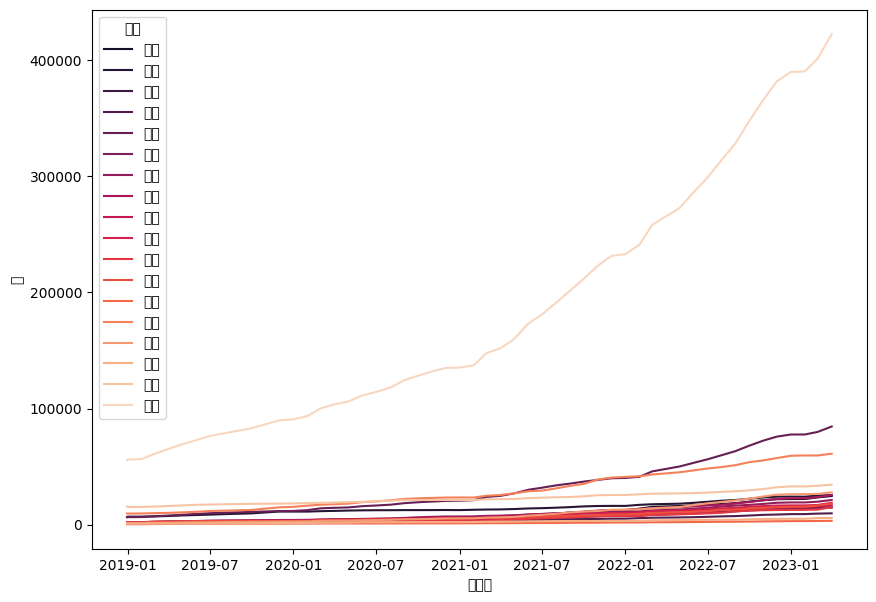

In [21]:
# 데이터프레임을 melt하여 '기준일'을 기준으로 데이터를 변형
df_melted = df_kor_ev.melt(id_vars=['기준일'], var_name='지역', value_name='값')

# 플롯 크기 설정
plt.figure(figsize=(10, 7))

# 선 그래프 그리기
sns.lineplot(data=df_melted, x='기준일', y='값', hue='지역', palette='rocket')

# 그래프 출력
plt.show()

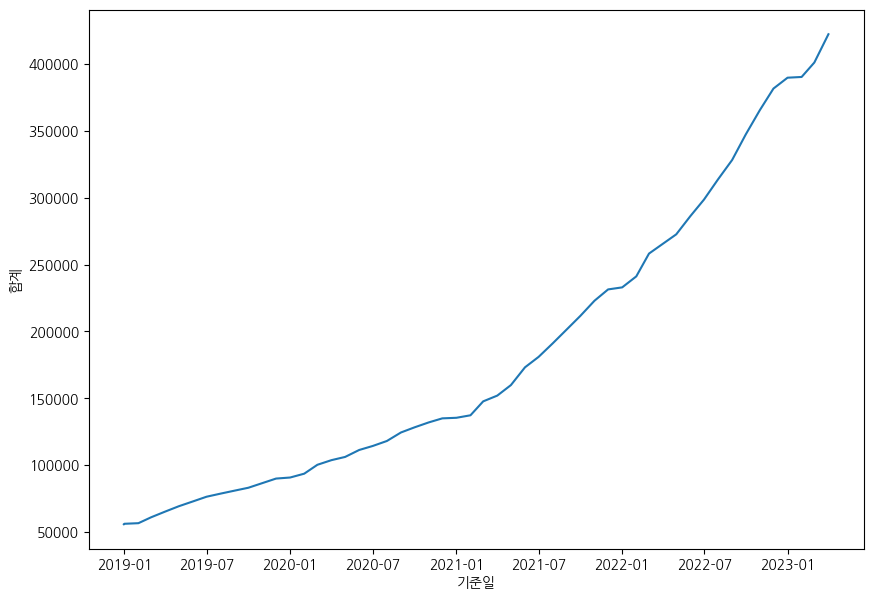

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(y = df_kor_ev['합계'], x = df_kor_ev['기준일'])
plt.show()

In [ ]:
df_kor_ev['year'] = df_kor_ev['기준일'].dt.year

In [ ]:
df_kor_ev

,기준일,부산,대구,대전,광주,경기,강원,경북,경남,충북,충남,전북,전남,세종,서울,인천,울산,제주,합계,year
0,2018-12-31,1567,6605,1334,1447,6383,1377,2001,2107,1199,1127,997,1974,394,9564,1284,847,15549,55756.0,2018
1,2019-01-01,1589,6885,1360,1446,6493,1393,2017,2123,1205,1142,1005,1997,402,9571,1298,862,15297,56085.0,2019
2,2019-02-01,1602,6927,1358,1462,6579,1423,2043,2211,1216,1161,1017,1999,414,9647,1341,864,15268,56532.0,2019
3,2019-03-01,1786,7140,1463,1587,7290,1567,2404,2602,1377,1559,1196,2514,535,9934,1499,902,15597,60952.0,2019
4,2019-04-01,1906,7475,1616,1736,7872,1727,2763,2783,1695,2051,1418,2687,642,10175,1686,927,16066,65225.0,2019
5,2019-05-01,2085,7964,1781,1870,8549,1833,2971,3005,1882,2246,1490,2817,728,10613,1842,959,16588,69223.0,2019
6,2019-06-01,2234,8307,1937,2024,9267,1945,3159,3108,1973,2308,1586,2979,800,11082,1985,1019,17101,72814.0,2019
7,2019-07-01,2410,8656,2117,2140,9877,2114,3409,3258,2074,2421,1641,3077,811,11764,2132,1079,17352,76332.0,2019
8,2019-08-01,2489,9053,2224,2213,10304,2236,3563,3392,2106,2490,1700,3122,826,12050,2210,1123,17559,78660.0,2019
9,2019-09-01,2567,9403,2303,2283,10657,2339,3670,3458,2144,2551,1752,3259,857,12389,2322,1169,17779,80902.0,2019


C:\Users\04-13\AppData\Local\Temp\ipykernel_11392\3377067013.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_kor_ev['year'], y=df_kor_ev['합계'], palette='pastel')


<Axes: xlabel='year', ylabel='합계'>

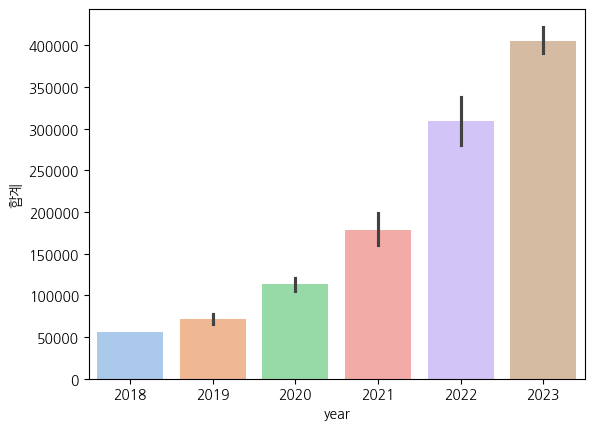

In [ ]:
sns.barplot(x=df_kor_ev['year'], y=df_kor_ev['합계'], palette='pastel')

In [ ]:
df_charge = pd.read_csv('data/한국전력공사_지역별 전기차 충전소 현황정보_20231231.csv')
df_charge

,지역,2016,2017,2018,2019,2020,2021,2022,2023
0,강원도,5,106,128,153,173,200,255,263
1,경기도,22,518,576,643,700,785,844,861
2,경상남도,24,182,218,237,340,393,414,430
3,경상북도,8,115,160,175,250,346,368,388
4,광주광역시,3,48,70,81,96,113,116,116
5,대구광역시,4,159,178,199,215,228,234,243
6,대전광역시,3,79,90,97,107,134,135,141
7,부산광역시,6,91,112,118,128,174,194,199
8,서울특별시,25,404,473,501,540,578,589,594
9,세종특별자치시,0,45,56,56,57,58,58,58


In [ ]:
df_charge = df_charge.set_index('지역')

In [ ]:
df_charge.T

지역,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
2016,5,22,24,8,3,4,3,6,25,0,4,3,20,9,6,5,13
2017,106,518,182,115,48,159,79,91,404,45,36,104,114,100,144,72,119
2018,128,576,218,160,70,178,90,112,473,56,40,115,139,119,172,92,138
2019,153,643,237,175,81,199,97,118,501,56,43,124,159,136,189,106,155
2020,173,700,340,250,96,215,107,128,540,57,46,140,171,154,189,141,179
2021,200,785,393,346,113,228,134,174,578,58,53,167,199,200,210,211,204
2022,255,844,414,368,116,234,135,194,589,58,55,186,259,207,216,212,210
2023,263,861,430,388,116,243,141,199,594,58,58,190,266,212,224,214,217


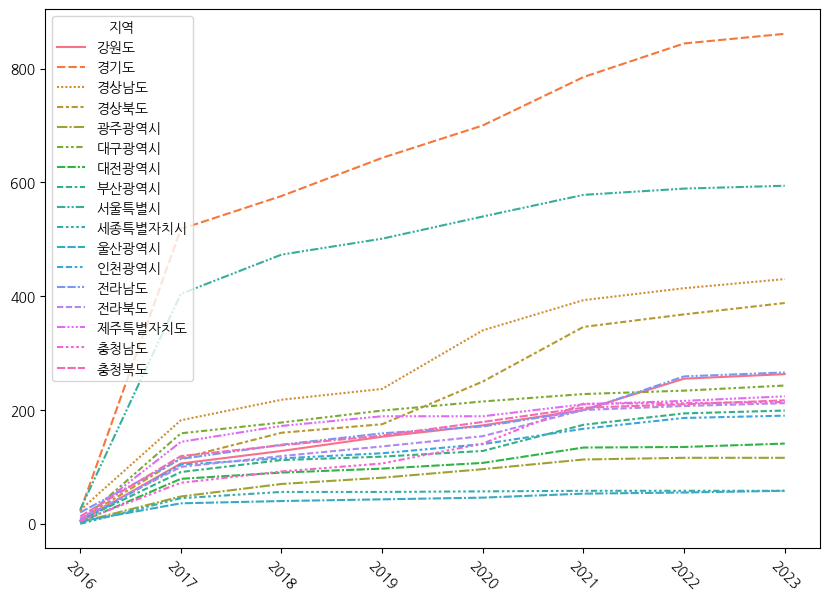

In [ ]:
plt.figure(figsize=(10, 7))
plt.xticks(rotation = -45)
sns.lineplot(df_charge.T)
plt.show()

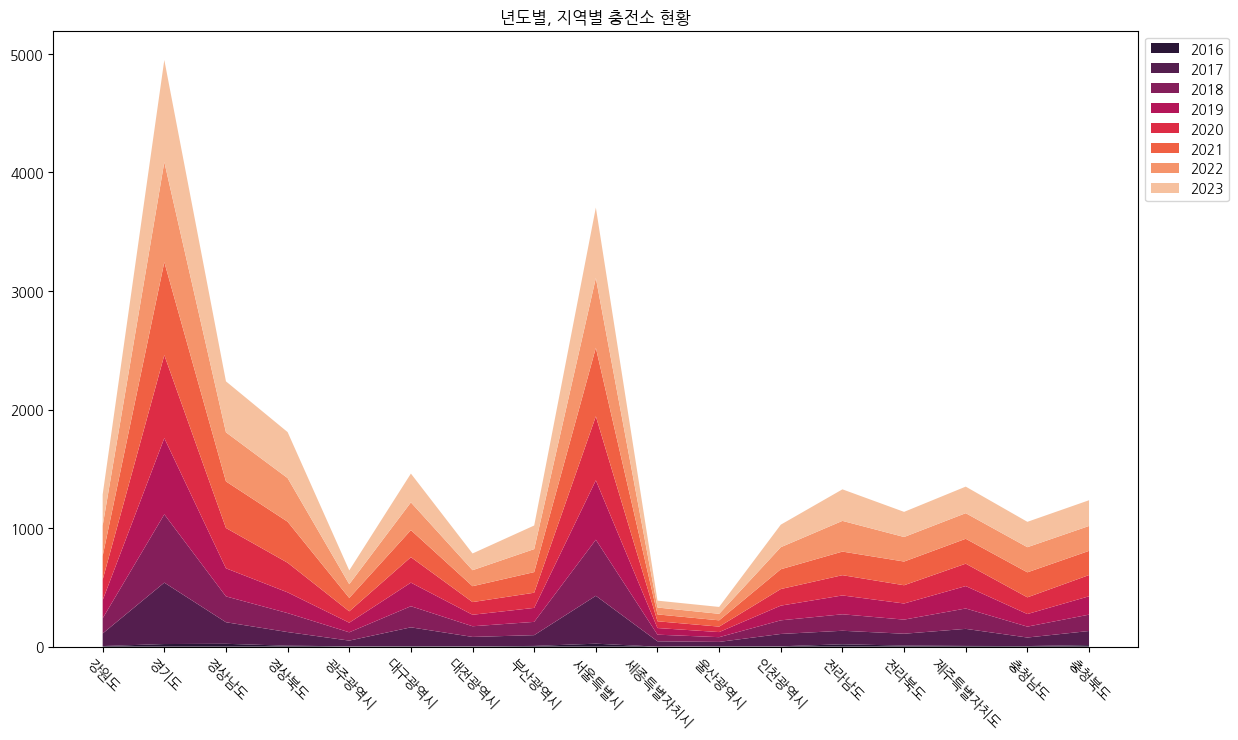

In [ ]:
# 스택형 선 그래프 그리기
plt.figure(figsize=(14, 8))
plt.xticks(rotation = -45)
plt.stackplot(df_charge.index, df_charge.T, labels=df_charge.columns, colors=sns.color_palette('rocket', n_colors=len(df_charge.columns)))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('년도별, 지역별 충전소 현황')
plt.show()

In [ ]:
df_ev_pre = df_ev_2.query('year < 2024')

In [ ]:
df_ev_pre['powertrain'].value_counts()

powertrain
EV                         4174
BEV                        2916
PHEV                       1840
FCEV                       1230
Publicly available slow     427
Publicly available fast     419
Name: count, dtype: int64

C:\Users\04-13\AppData\Local\Temp\ipykernel_11392\937533367.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='모델명', y='판매량', data=df, ax=ax1, palette='muted')
C:\Users\04-13\AppData\Local\Temp\ipykernel_11392\937533367.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


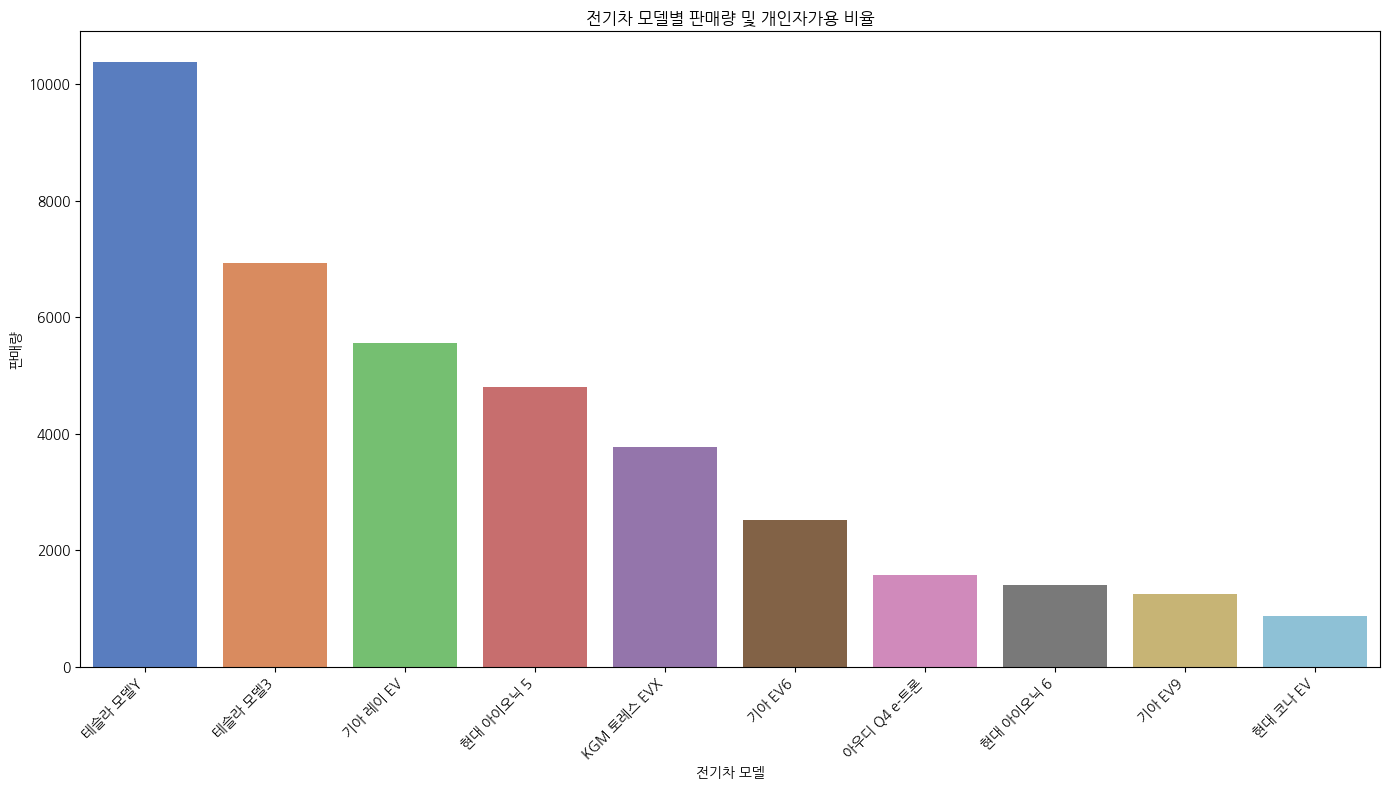

In [ ]:
# 데이터 생성
data = {
    '모델명': [
        '테슬라 모델Y', '테슬라 모델3', '기아 레이 EV', '현대 아이오닉 5', 
        'KGM 토레스 EVX', '기아 EV6', '아우디 Q4 e-트론', '현대 아이오닉 6', 
        '기아 EV9', '현대 코나 EV'
    ],
    '판매량': [
        10382, 6934, 5560, 4801, 3774, 2524, 1570, 1404, 1251, 871
    ],
    '개인자가용 비율 (%)': [
        89.0, 85.8, 74.9, 53.4, 82.7, 38.4, 84.0, 58.1, 72.0, 54.7
    ]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 8))

# 판매량 바 차트
color = 'tab:blue'
ax1.set_xlabel('전기차 모델')
ax1.set_ylabel('판매량')
sns.barplot(x='모델명', y='판매량', data=df, ax=ax1, palette='muted')
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


# 제목
plt.title('전기차 모델별 판매량 및 개인자가용 비율')

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
df_car_kor = pd.read_excel('data/2024년_07월_자동차_등록자료_통계.xlsx', sheet_name='10.연료별_등록현황', header=2)
df_car_kor

,연료별,시도별,Unnamed: 2,서울,부산,대구,인천,광주,대전,울산,...,경기,강원,충북,충남,전북,전남,경북,경남,제주,계
0,NaN,종별,용도별,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,휘발유,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,휘발유,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,휘발유,승용,비사업용,1625782.0,688732.0,591750.0,723499.0,319607.0,347697.0,307169.0,...,3191214.0,384912.0,419964.0,559259.0,409147.0,406604.0,671491.0,885996.0,186384.0,11817781.0
4,휘발유,승용,사업용,21899.0,57393.0,8904.0,116955.0,1943.0,10874.0,1115.0,...,17069.0,2083.0,4392.0,2770.0,1937.0,98931.0,1958.0,53989.0,142760.0,545362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,총계,특수,사업용,5236.0,9045.0,2205.0,5411.0,1938.0,1734.0,2264.0,...,12362.0,2032.0,2907.0,3283.0,2567.0,5164.0,5395.0,5734.0,741.0,68190.0
286,총계,특수,계,11561.0,12371.0,5227.0,9462.0,4078.0,3883.0,3726.0,...,31206.0,5495.0,6462.0,7896.0,5919.0,9357.0,10820.0,11109.0,2324.0,141767.0
287,총계,소계,비사업용,2987468.0,1362854.0,1202771.0,1471210.0,695290.0,686041.0,582603.0,...,6335289.0,845814.0,904864.0,1222737.0,963506.0,1029031.0,1498520.0,1809475.0,428417.0,24222641.0
288,총계,소계,사업용,197275.0,181968.0,56892.0,274088.0,32874.0,45822.0,21938.0,...,258890.0,26748.0,39879.0,41435.0,36016.0,235503.0,49069.0,156697.0,281500.0,1940521.0


In [ ]:
df_car_kor.drop(0, axis=0, inplace=True)

In [ ]:
df_car_kor

,연료별,시도별,Unnamed: 2,서울,부산,대구,인천,광주,대전,울산,...,경기,강원,충북,충남,전북,전남,경북,경남,제주,계
1,휘발유,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,휘발유,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,휘발유,승용,비사업용,1625782.0,688732.0,591750.0,723499.0,319607.0,347697.0,307169.0,...,3191214.0,384912.0,419964.0,559259.0,409147.0,406604.0,671491.0,885996.0,186384.0,11817781.0
4,휘발유,승용,사업용,21899.0,57393.0,8904.0,116955.0,1943.0,10874.0,1115.0,...,17069.0,2083.0,4392.0,2770.0,1937.0,98931.0,1958.0,53989.0,142760.0,545362.0
5,휘발유,승용,계,1647681.0,746125.0,600654.0,840454.0,321550.0,358571.0,308284.0,...,3208283.0,386995.0,424356.0,562029.0,411084.0,505535.0,673449.0,939985.0,329144.0,12363143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,총계,특수,사업용,5236.0,9045.0,2205.0,5411.0,1938.0,1734.0,2264.0,...,12362.0,2032.0,2907.0,3283.0,2567.0,5164.0,5395.0,5734.0,741.0,68190.0
286,총계,특수,계,11561.0,12371.0,5227.0,9462.0,4078.0,3883.0,3726.0,...,31206.0,5495.0,6462.0,7896.0,5919.0,9357.0,10820.0,11109.0,2324.0,141767.0
287,총계,소계,비사업용,2987468.0,1362854.0,1202771.0,1471210.0,695290.0,686041.0,582603.0,...,6335289.0,845814.0,904864.0,1222737.0,963506.0,1029031.0,1498520.0,1809475.0,428417.0,24222641.0
288,총계,소계,사업용,197275.0,181968.0,56892.0,274088.0,32874.0,45822.0,21938.0,...,258890.0,26748.0,39879.0,41435.0,36016.0,235503.0,49069.0,156697.0,281500.0,1940521.0


In [48]:
other_list = ['FIAT', 'HONDA', 'MERCEDES-BENZ', 'MITSUBISHI', 'MINI',
'POLESTAR', 'SMART', 'SUBARU', 'JAGUAR', 'LINCOLN', 'LUCID', 'CADILLAC',
'LEXUS', 'GENESIS', 'LAND ROVER', 'FISKER', 'MAZDA', 'AZURE DYNAMICS',
'TH!NK', 'WHEEGO ELECTRIC CARS', 'BENTLEY']

In [54]:
list_car = []
for i in df_ev['Make']:
    if i in other_list:
        list_car.append('etc')
    else:
        list_car.append(i)

In [100]:
df_ev_copy = df_ev.copy()
df_ev_copy['Make'] = list_car
df_car_value = df_ev_copy['Make'].value_counts(normalize=True)

In [82]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Category20c
from math import pi

# 데이터 설정
data = {
    'Make': ['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'etc', 'BMW', 'KIA', 'TOYOTA', 'VOLKSWAGEN',
             'VOLVO', 'AUDI', 'JEEP', 'HYUNDAI', 'CHRYSLER', 'RIVIAN', 'PORSCHE'],
    'proportion': [0.457708, 0.097380, 0.084695, 0.051075, 0.044417, 0.043654, 0.040663, 0.036160,
                   0.026111, 0.023853, 0.020194, 0.019365, 0.017736, 0.016566, 0.013374, 0.007050]
}

# DataFrame 생성
df = pd.DataFrame(data)

# 각 파이 조각의 각도 계산
df['angle'] = df['proportion'] * 2 * pi

# 색상 할당
df['color'] = Category20c[len(df)]

# 노트북에서 출력 설정
output_notebook()

# 도넛 차트 생성
p = figure(height=700, width=700, title="Vehicle Make Proportions", toolbar_location=None,
           tools="hover", tooltips="@Make: @proportion{0.00%}", x_range=(-2, 2), y_range=(-2, 2))

p.wedge(x=0, y=0, radius=1.5, start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Make', source=df)

# 도넛 모양을 위해 중앙에 원 추가
p.circle(x=0, y=0, radius=0.4, color="white", alpha=0.7)

# 스타일 설정
p.axis.visible = False
p.grid.grid_line_color = None
p.legend.location = "top_left"
p.legend.label_text_font_size = "10pt"

# 차트 출력
show(p)

Loading BokehJS ...

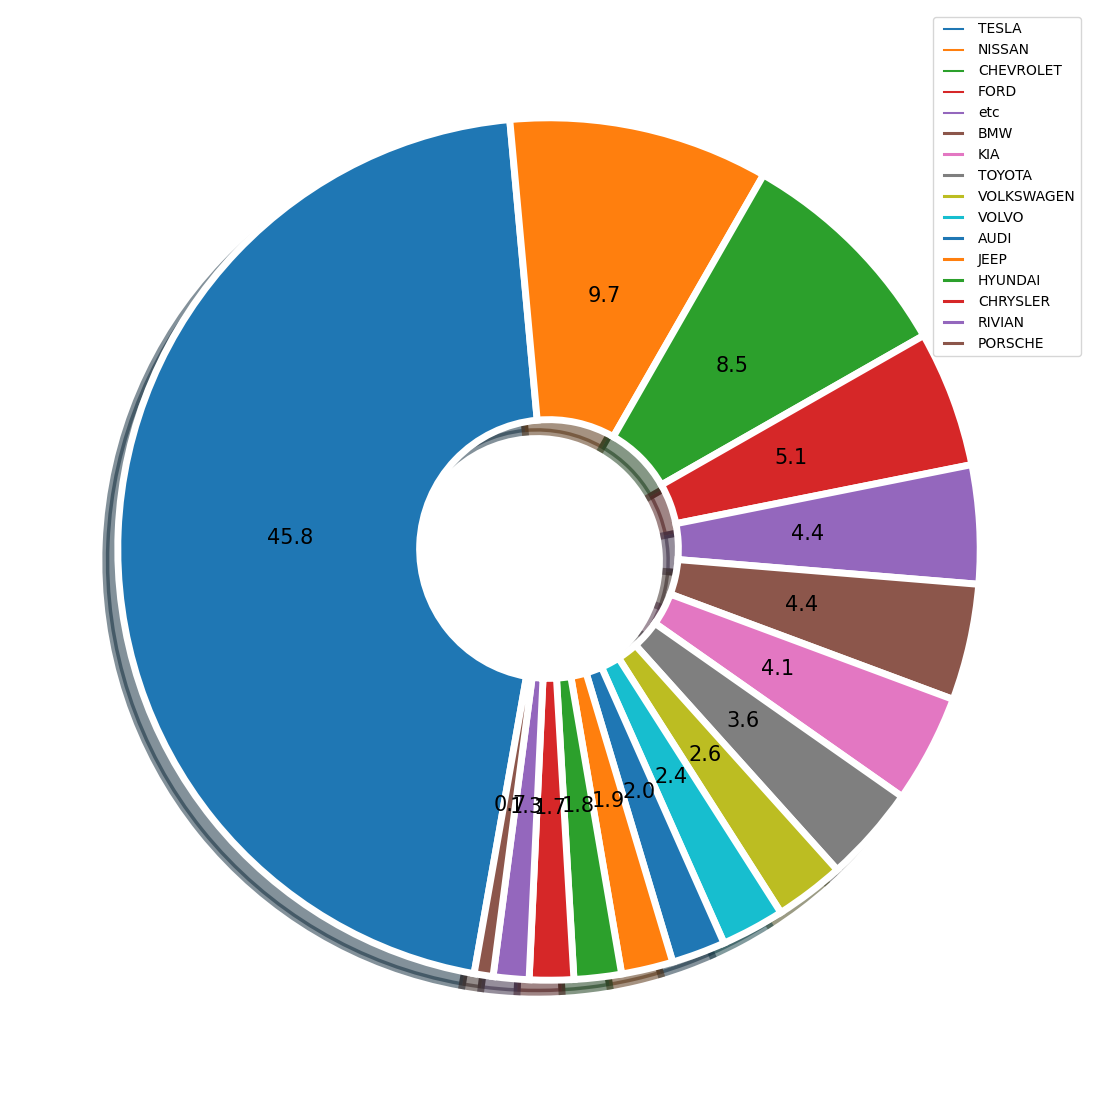

In [101]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 14))
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.xticks(rotation = -45)
plt.pie(df_car_value, autopct='%.1f', startangle=260, counterclock=False, wedgeprops=wedgeprops, shadow=True, textprops={'size': 15})
plt.legend(df_car_value.index)
plt.show()

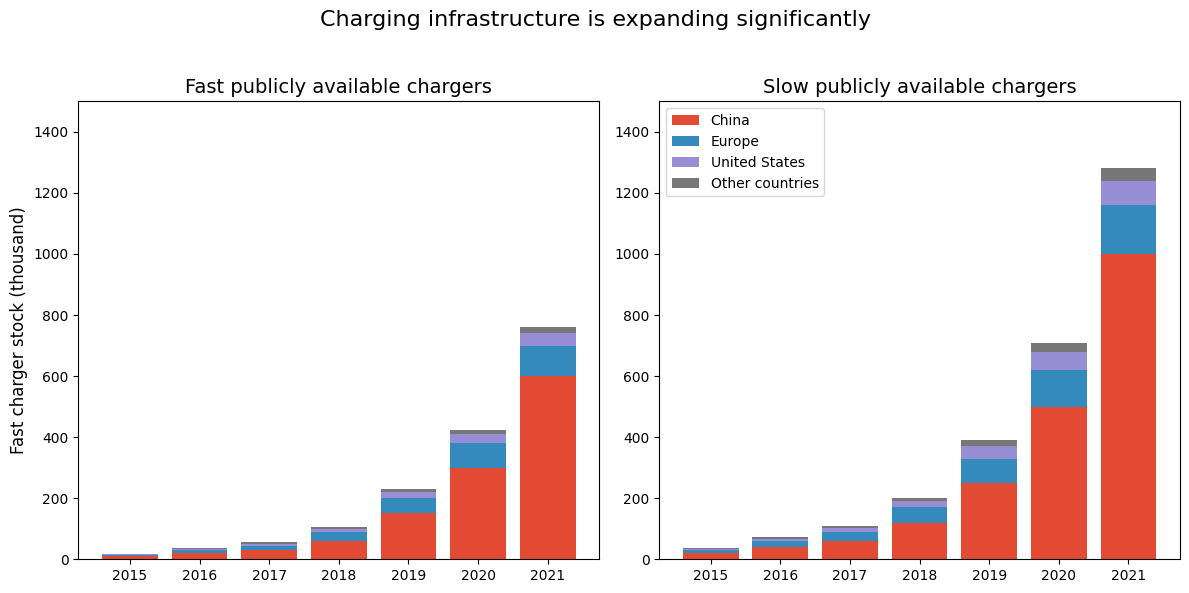

In [106]:
# 데이터 설정
years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

# Fast chargers
china_fast = np.array([10, 20, 30, 60, 150, 300, 600])
europe_fast = np.array([5, 10, 15, 30, 50, 80, 100])
us_fast = np.array([2, 4, 6, 10, 20, 30, 40])
other_fast = np.array([1, 2, 4, 6, 10, 15, 20])

# Slow chargers
china_slow = np.array([20, 40, 60, 120, 250, 500, 1000])
europe_slow = np.array([10, 20, 30, 50, 80, 120, 160])
us_slow = np.array([4, 8, 12, 20, 40, 60, 80])
other_slow = np.array([2, 4, 8, 12, 20, 30, 40])

# 색상 설정
colors = ['#E24A33', '#348ABD', '#988ED5', '#777777']  # Red, Blue, Green, Gray

# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Fast chargers 서브플롯
axes[0].bar(years, china_fast, color=colors[0], label='China')
axes[0].bar(years, europe_fast, bottom=china_fast, color=colors[1], label='Europe')
axes[0].bar(years, us_fast, bottom=china_fast + europe_fast, color=colors[2], label='United States')
axes[0].bar(years, other_fast, bottom=china_fast + europe_fast + us_fast, color=colors[3], label='Other countries')

axes[0].set_title('Fast publicly available chargers', fontsize=14)
axes[0].set_ylabel('Fast charger stock (thousand)', fontsize=12)
axes[0].set_ylim(0, 1500)

# Slow chargers 서브플롯
axes[1].bar(years, china_slow, color=colors[0], label='China')
axes[1].bar(years, europe_slow, bottom=china_slow, color=colors[1], label='Europe')
axes[1].bar(years, us_slow, bottom=china_slow + europe_slow, color=colors[2], label='United States')
axes[1].bar(years, other_slow, bottom=china_slow + europe_slow + us_slow, color=colors[3], label='Other countries')

axes[1].set_title('Slow publicly available chargers', fontsize=14)
axes[1].set_ylim(0, 1500)

# 범례 추가
axes[1].legend(loc='upper left', fontsize=10)

# 전체 제목 및 레이아웃 조정
plt.suptitle('Charging infrastructure is expanding significantly', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 그래프 출력
plt.show()

In [133]:
df_ev_2_copy = df_ev_2.copy()
df_ev_2_copy = df_ev_2_copy.query('year < 2025')

df_ev_2_group = df_ev_2_copy.groupby(['year', 'powertrain'], as_index=False)\
       .agg(n = ('powertrain', 'count'))

In [134]:
df_ev_2_group

,year,powertrain,n
0,2010,BEV,102
1,2010,EV,147
2,2010,FCEV,25
3,2010,PHEV,21
4,2010,Publicly available fast,2
...,...,...,...
79,2023,EV,499
80,2023,FCEV,206
81,2023,PHEV,232
82,2023,Publicly available fast,48


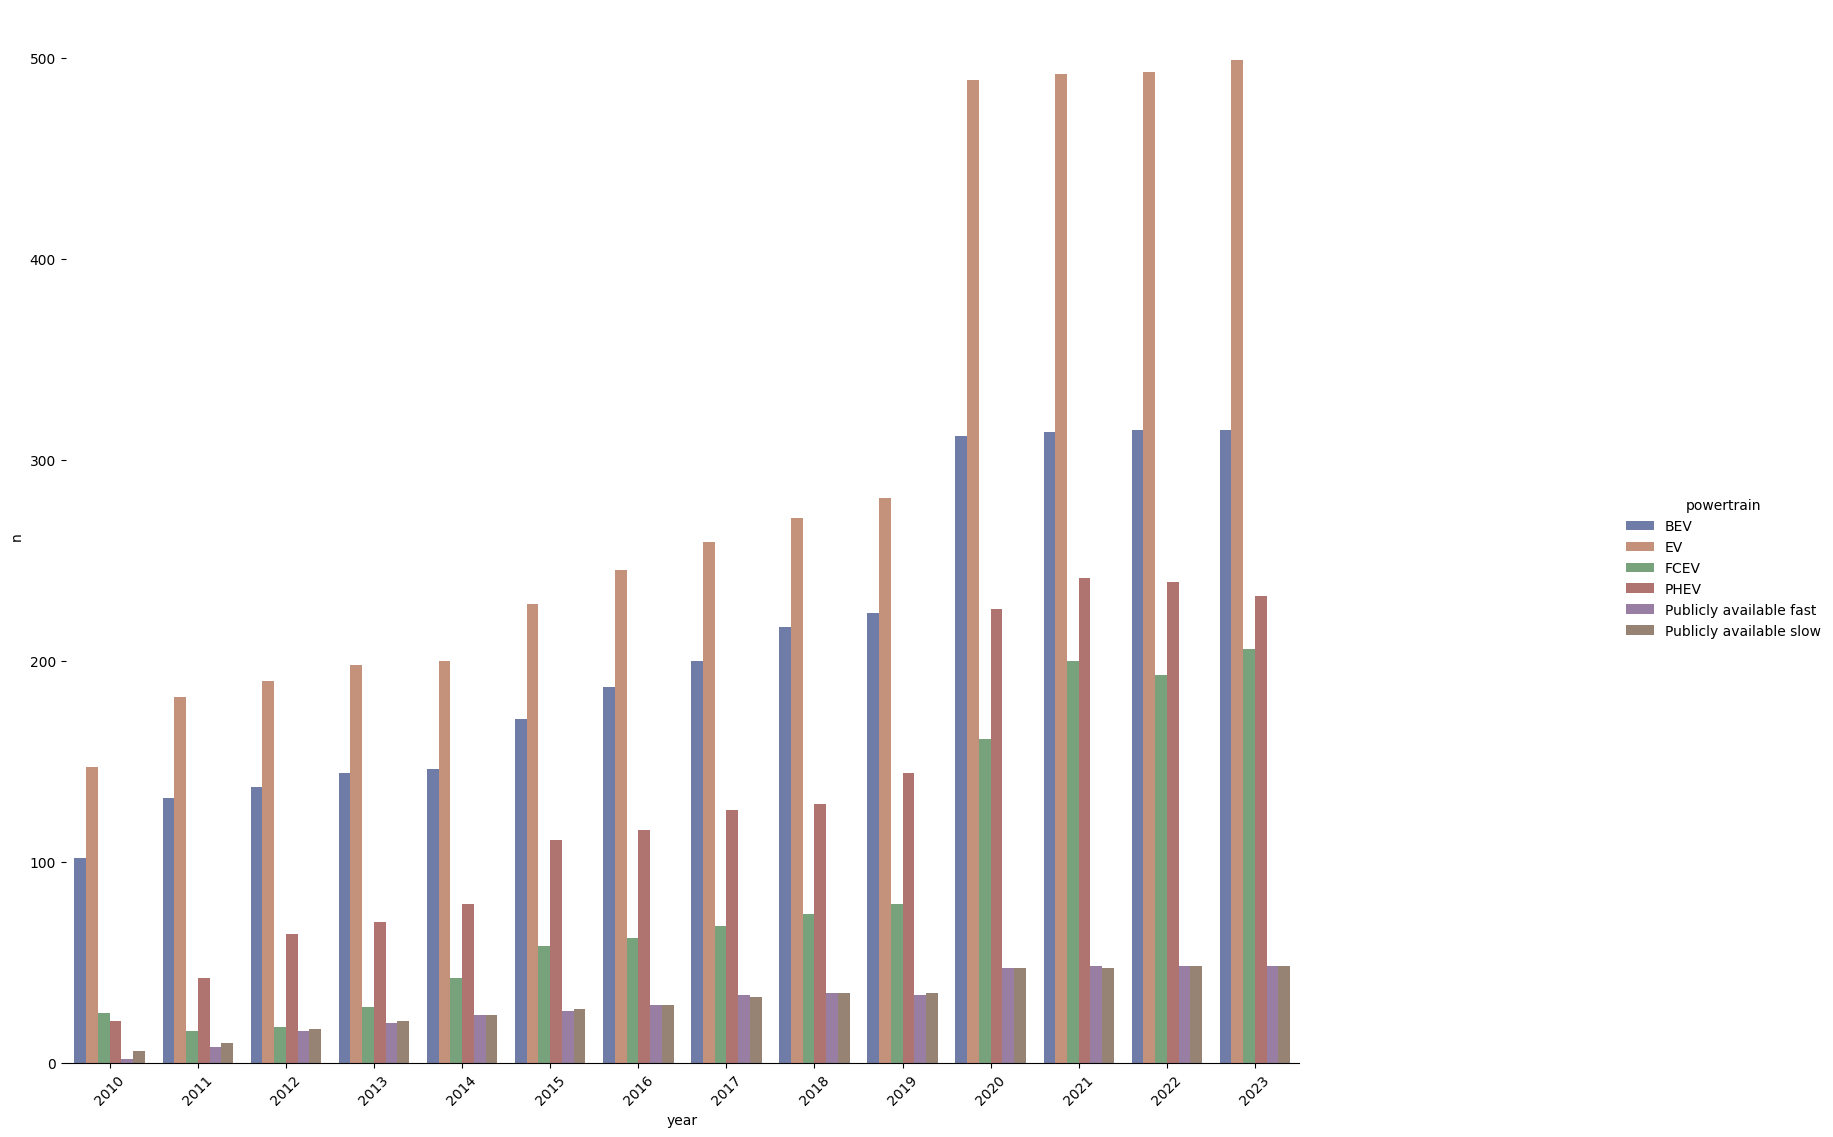

In [135]:
g = sns.catplot(data=df_ev_2_group, kind='bar',
            x='year', y='n', hue='powertrain',
            errorbar='sd', palette='dark', alpha=.6, height=6)
g.fig.set_size_inches(20, 12)
g.despine(left=True)
plt.xticks(rotation=45)
plt.show()